In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_seq_items = 2000

In [4]:
df = pd.read_csv('players_22.csv' ,low_memory= False)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


## Exploring the data

In [5]:
# drop any column has url in it
df = df[df.columns.drop(list(df.filter(regex='url')))]

In [6]:
# Columns types
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'player_positions', 'overall',
       'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm',
       'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_loaned_from',
       'club_joined', 'club_contract_valid_until', 'nationality_id',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

In [7]:
pd.options.display.max_seq_items = 2000

In [8]:
# Check for null values
df.isnull().sum()

sofifa_id           0
short_name          0
long_name           0
player_positions    0
overall             0
                   ..
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
Length: 104, dtype: int64

In [9]:
df.select_dtypes(include='number').columns


Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

In [10]:
df = df.drop(['sofifa_id'], axis=1)

## EDA

### Q1. what are the height, wage, weight and age distribution of players?

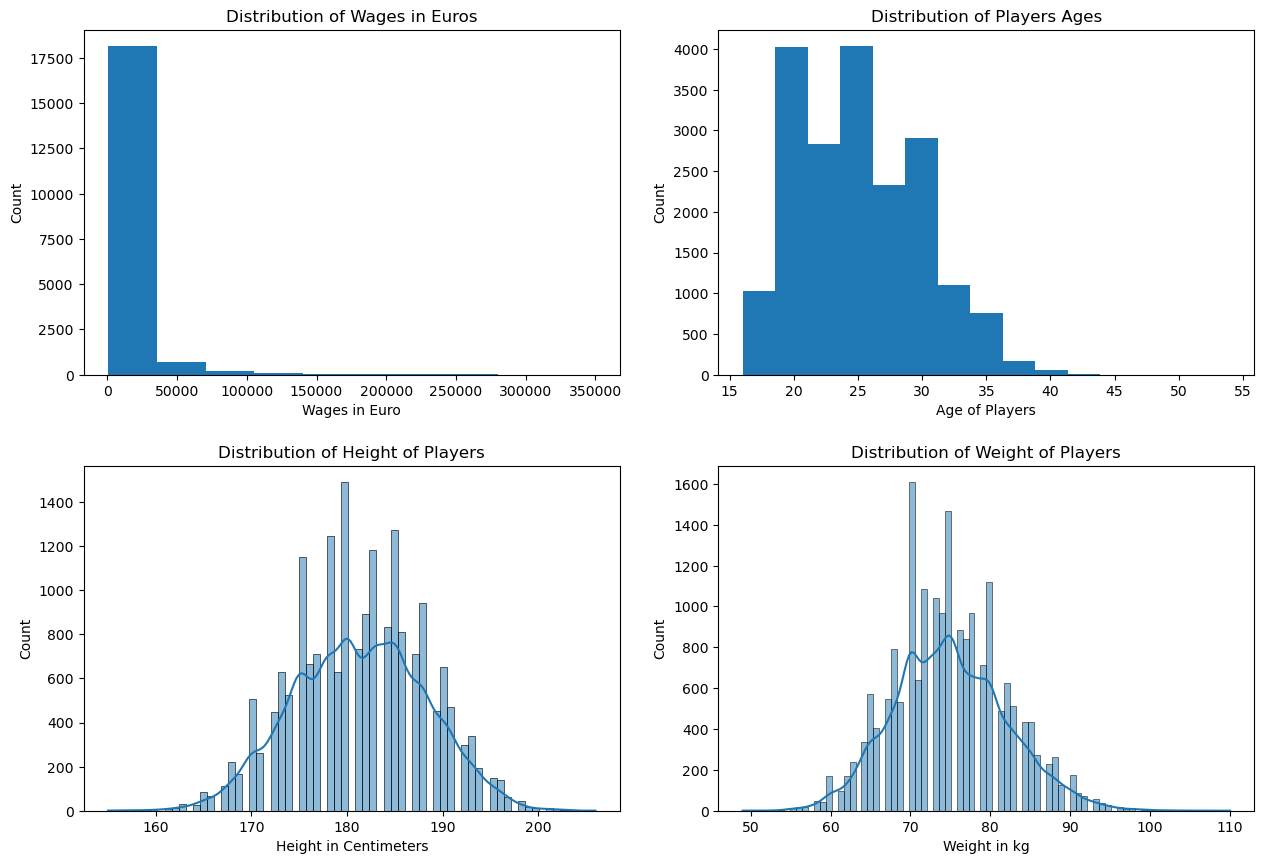

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(df['wage_eur'])
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[0,1].hist(df['age'], bins = 15)
axes[0,1].set_xlabel('Age of Players')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Players Ages')

axes[1,0].set_title('Distribution of Height of Players')
sns.histplot(df, x='height_cm', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Height in Centimeters')
axes[1,0].set_ylabel('Count')


axes[1,1].set_title('Distribution of Weight of Players')
sns.histplot(df, x='weight_kg', ax=axes[1,1], kde=True)
axes[1,1].set_xlabel('Weight in kg')
axes[1,1].set_ylabel('Count')


plt.tight_layout(pad=2)
plt.show()

### Q2. Calculate the number of players whose preferred foot is right and left. 

In [12]:
# caclcute the number of player whose preferred_foot is left or right
df['preferred_foot'].value_counts()


Right    14674
Left      4565
Name: preferred_foot, dtype: int64

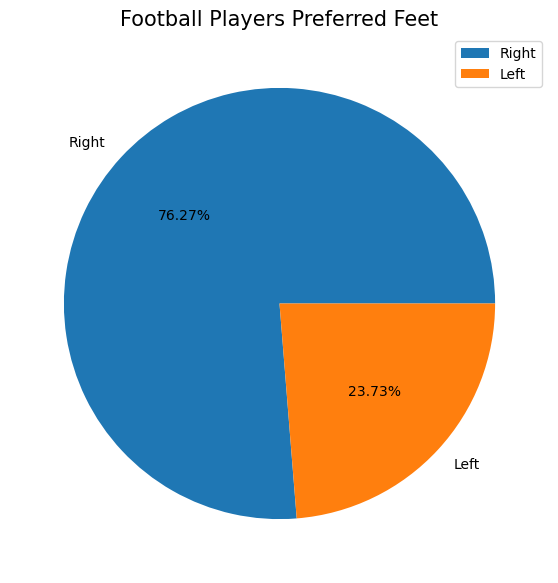

In [13]:
# Vizualize with Pie chart
preferred_foot_labels = df["preferred_foot"].value_counts().index 
preferred_foot_values = df["preferred_foot"].value_counts().values
# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()

## Q3. What arrtibutes that have the max affect on wage of players? (correlation)

In [14]:
corr_matrix = df.select_dtypes(include='number').corr()

# then we can sort the corr with wage_eur column
# getting top 20 features that have correlation with wage_eur
correlated_columns = corr_matrix['wage_eur'].abs().sort_values(ascending=False).head(20).index.to_list()
df_correlated= df[correlated_columns]


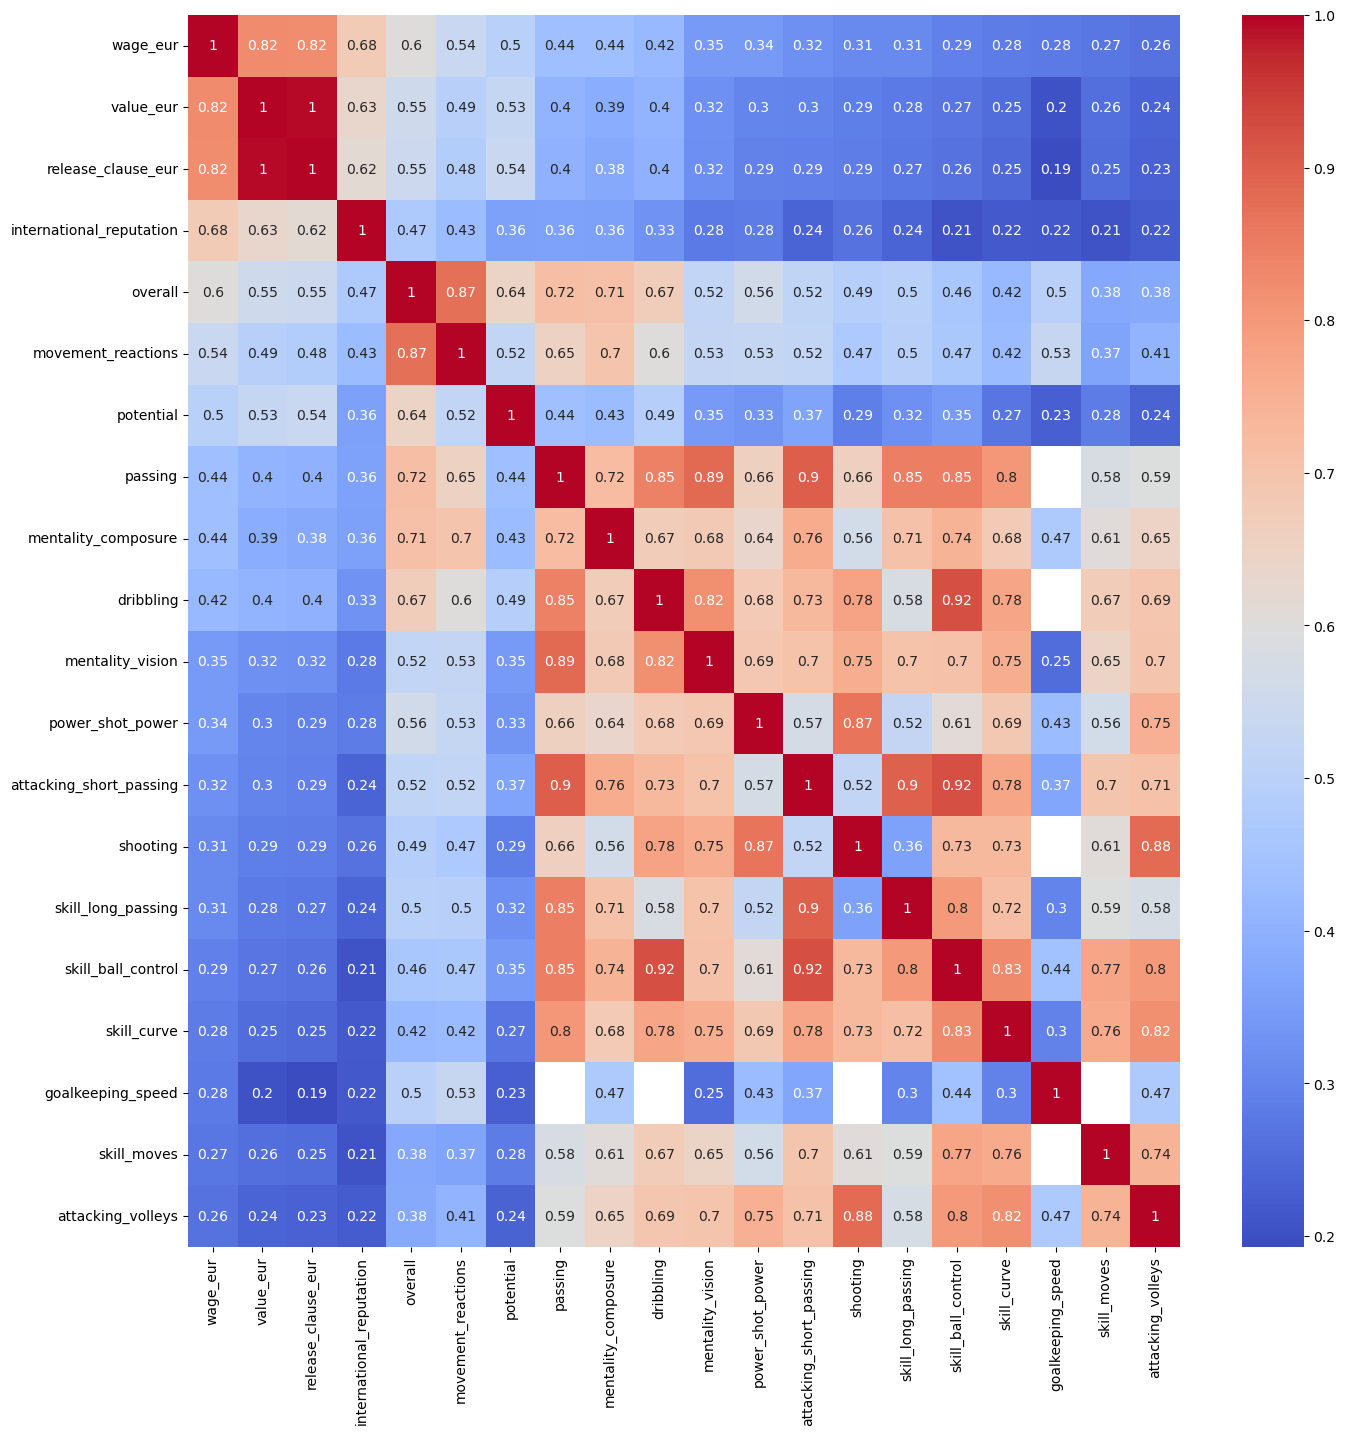

In [15]:
corr_matrix_reduced = df_correlated.select_dtypes(include='number').corr()
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm')
plt.show()

In [16]:

correlated_columns

['wage_eur',
 'value_eur',
 'release_clause_eur',
 'international_reputation',
 'overall',
 'movement_reactions',
 'potential',
 'passing',
 'mentality_composure',
 'dribbling',
 'mentality_vision',
 'power_shot_power',
 'attacking_short_passing',
 'shooting',
 'skill_long_passing',
 'skill_ball_control',
 'skill_curve',
 'goalkeeping_speed',
 'skill_moves',
 'attacking_volleys']

## Q4. what is the relation between mentality vision of the player and his wage?

Correlation between mentality_vision and wage_eur is:  0.34714085847972004


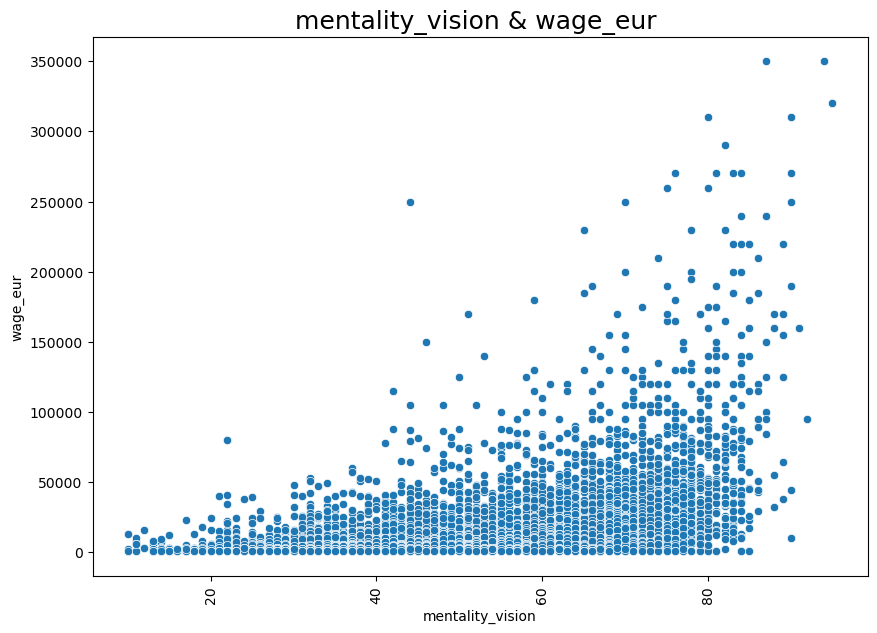

In [17]:
# getting correlation value
mentality_wage_corr = corr_matrix['wage_eur']['mentality_vision']
print("Correlation between mentality_vision and wage_eur is: ",mentality_wage_corr)


plt.figure(figsize=(10,7))
sns.scatterplot(x=df_correlated['mentality_vision'] ,y = df_correlated['wage_eur'],sizes=(20, 400), legend="full")
plt.xticks(rotation=90)
plt.title("mentality_vision & wage_eur ", fontsize = 18)
plt.show()

# we can observe that there is a positive correlation between mentality_vision and wage_eur
# while the mentality vision increases the wage_eur increases too

In [18]:
df_correlated.head()

,wage_eur,value_eur,release_clause_eur,international_reputation,overall,movement_reactions,potential,passing,mentality_composure,dribbling,mentality_vision,power_shot_power,attacking_short_passing,shooting,skill_long_passing,skill_ball_control,skill_curve,goalkeeping_speed,skill_moves,attacking_volleys
0,320000.0,78000000.0,144300000.0,5,93,94,93,91.0,96,95.0,95,86,91,92.0,91,96,93,NaN,4,88
1,270000.0,119500000.0,197200000.0,5,92,93,92,79.0,88,86.0,81,90,85,92.0,70,88,79,NaN,4,89
2,270000.0,45000000.0,83300000.0,5,91,94,91,80.0,95,88.0,76,94,80,94.0,77,88,81,NaN,5,86
3,270000.0,129000000.0,238700000.0,5,91,89,91,86.0,93,94.0,90,80,86,83.0,81,95,88,NaN,5,86
4,350000.0,125500000.0,232200000.0,4,91,91,91,93.0,89,88.0,94,91,94,86.0,93,91,85,NaN,4,82


# Q5. does skill curve of players affected by their age?

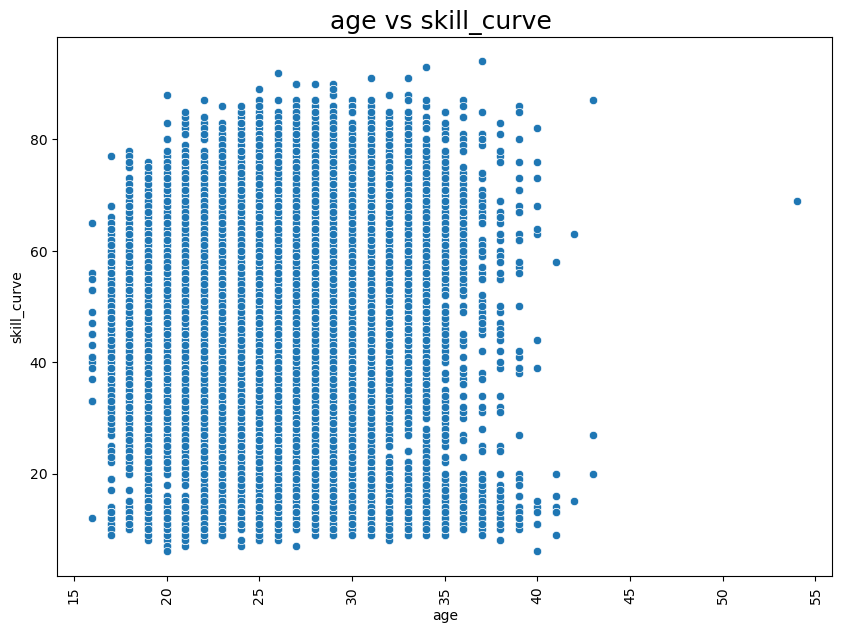

Correlation between age and skill_curve is:  0.15111110495515964


In [19]:
# age vs skill_curve
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['age'] ,y = df['skill_curve'],sizes=(20, 400), legend="full")
plt.xticks(rotation=90)
plt.title("age vs skill_curve ", fontsize = 18)
plt.show()

# correlation between age and skill_curve
age_skill_curve_corr = corr_matrix['age']['skill_curve']
print("Correlation between age and skill_curve is: ",age_skill_curve_corr)

# we can observe that age has weak correlation with skill_curve



In [20]:
correlated_columns

['wage_eur',
 'value_eur',
 'release_clause_eur',
 'international_reputation',
 'overall',
 'movement_reactions',
 'potential',
 'passing',
 'mentality_composure',
 'dribbling',
 'mentality_vision',
 'power_shot_power',
 'attacking_short_passing',
 'shooting',
 'skill_long_passing',
 'skill_ball_control',
 'skill_curve',
 'goalkeeping_speed',
 'skill_moves',
 'attacking_volleys']

## Q6. who are the top 20 potential players in the data set?

Text(0.5, 1.0, 'Top 20 players with the highest potential')

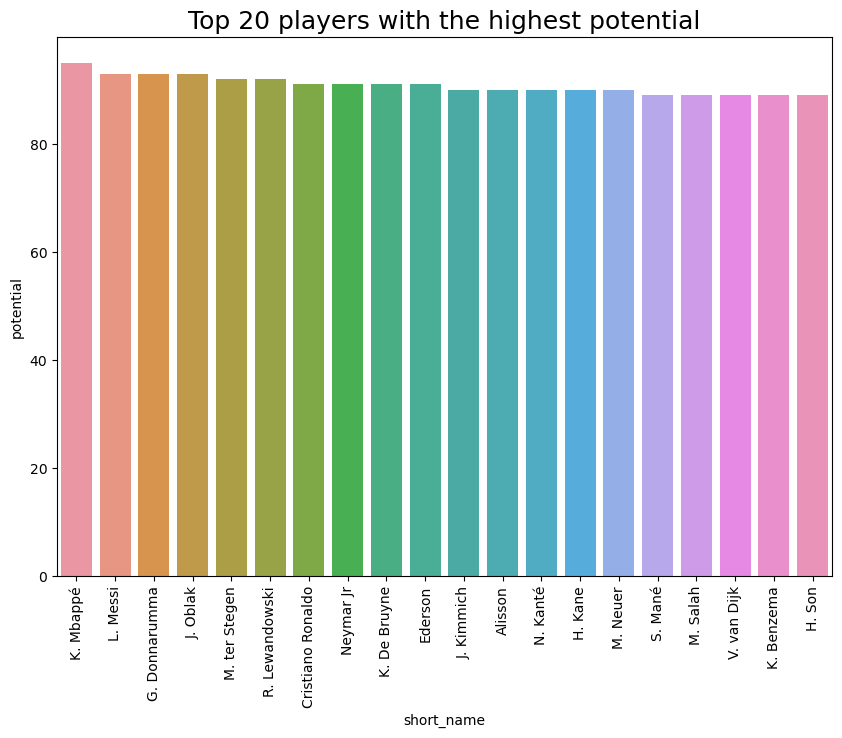

In [21]:
# plotting top 20 (overall) players with the highest potential
# we use the overall value to get the top 10 players
top20_overall = df.sort_values(by='overall', ascending=False).head(20)

# sorting the top 20 players with their potential
top20 = top20_overall.sort_values(by='potential', ascending=False)

# plotting top 10 (overall) players with their potential adding their nationality
plt.figure(figsize=(10,7))
sns.barplot(x= top20['short_name'] , y= top20['potential'])
plt.xticks(rotation=90)
plt.title("Top 20 players with the highest potential", fontsize = 18)

## Q7. How does international reputation affect the the wage?

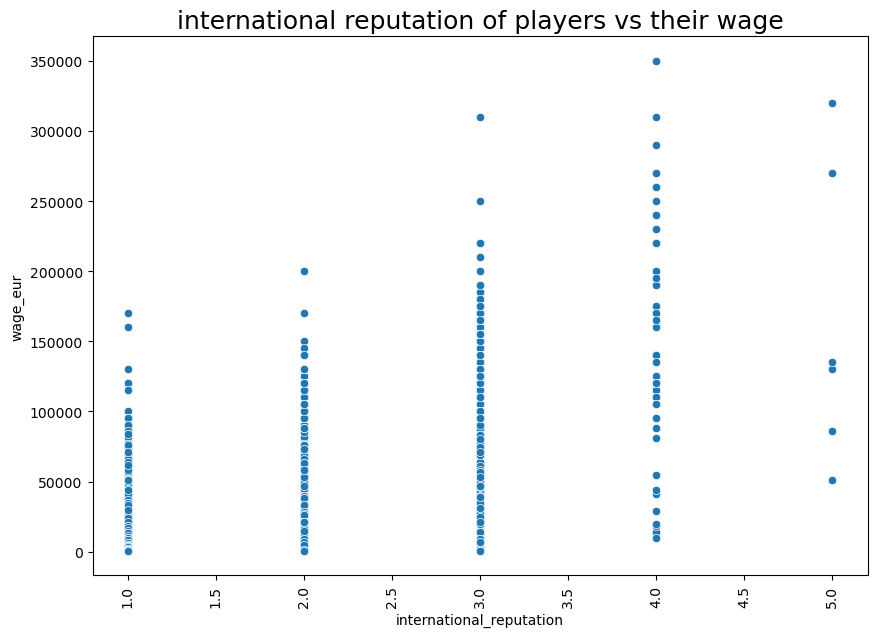

Correlation between international reputation and wage is:  0.6756370346386225


In [22]:
#  the international reputation of players vs their wage
plt.figure(figsize=(10,7))
sns.scatterplot(x= df['international_reputation'] , y= df['wage_eur'])
plt.xticks(rotation=90)
plt.title("international reputation of players vs their wage", fontsize = 18)
plt.show()

# correlation between international reputation and wage 
international_reputation_wage_corr = corr_matrix['international_reputation']['wage_eur']
print("Correlation between international reputation and wage is: ",international_reputation_wage_corr)

# international reputation has a positive strong correlation with wage_eur
# as the international reputation increases the wage_eur increases too


## Q8. what is the distribution of player_positions in the data set for the top 50?

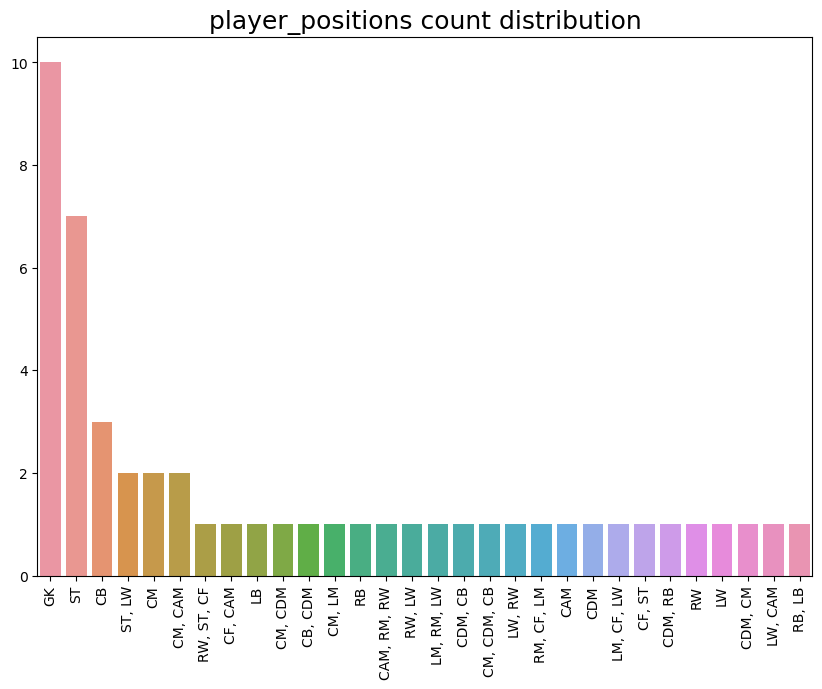

In [23]:
top50 = df.sort_values(by='overall', ascending=False).head(50)
# player_positions count distribution
plt.figure(figsize=(10,7))
sns.barplot(x=top50['player_positions'].value_counts().index ,y = top50['player_positions'].value_counts().values)
plt.xticks(rotation=90)
plt.title("player_positions count distribution", fontsize = 18)
plt.show()

# what are very interesting is that the highes common position is GK (Goalkeeper) and the second one is ST (Striker)



## Q9. what is the nationality percentage for the top 50 players?

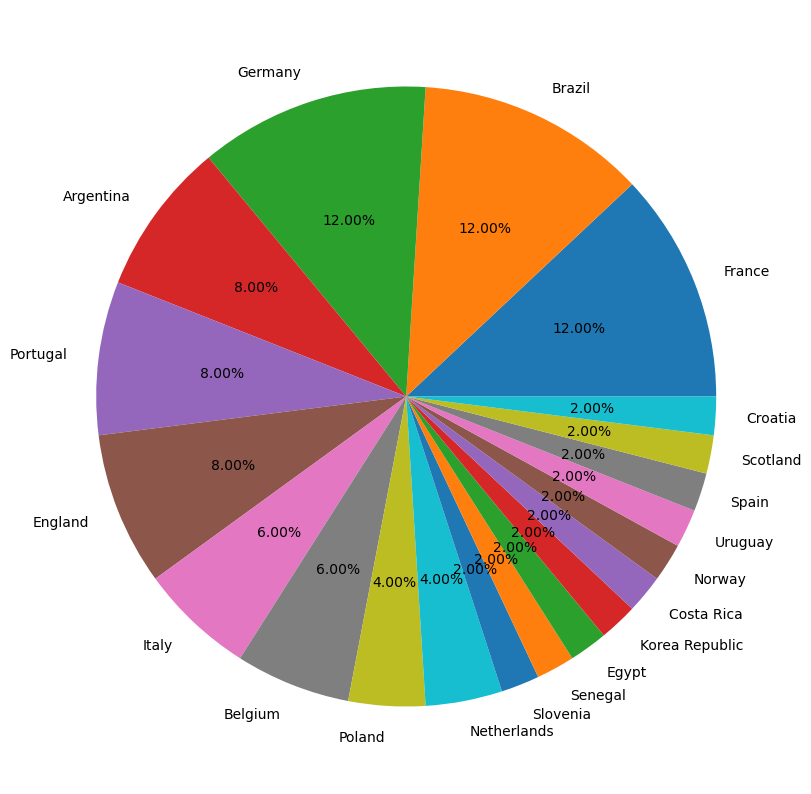

The top 5 countries with the highest number of players are: 
 ['France', 'Germany', 'Brazil', 'Argentina', 'Portugal']


In [24]:
# nationality count distribution for the whole dataset using pie chart
plt.figure(figsize=(10,12))
plt.pie(top50['nationality_name'].value_counts().values , labels= top50['nationality_name'].value_counts().index,autopct='%1.2f%%')
plt.show()

# print the top 5 countries with the highest number of players
top4_countries = top50['nationality_name'].value_counts().sort_values(ascending=False).head(5)
print("The top 5 countries with the highest number of players are: \n",top4_countries.index.to_list())


## Q10. what is the nationality of the highes mentality of the top 50 player?

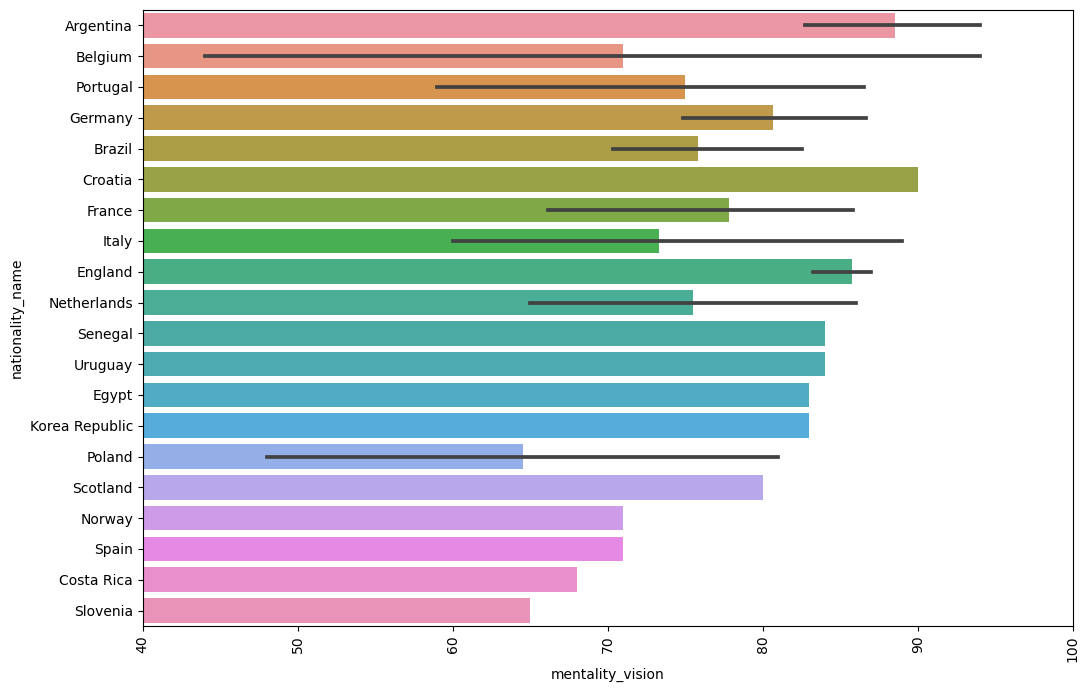

In [25]:
# nationality vs mentality_vision
# sort the top 50 players with their mentality_vision
top50_men = top50.sort_values(by='mentality_vision', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x= top50_men['mentality_vision'] , y= top50_men['nationality_name'])
plt.xlim(40, 100)
plt.xticks(rotation=90)
plt.show()



## Q11. who are the highest wage players in the top 50 players?

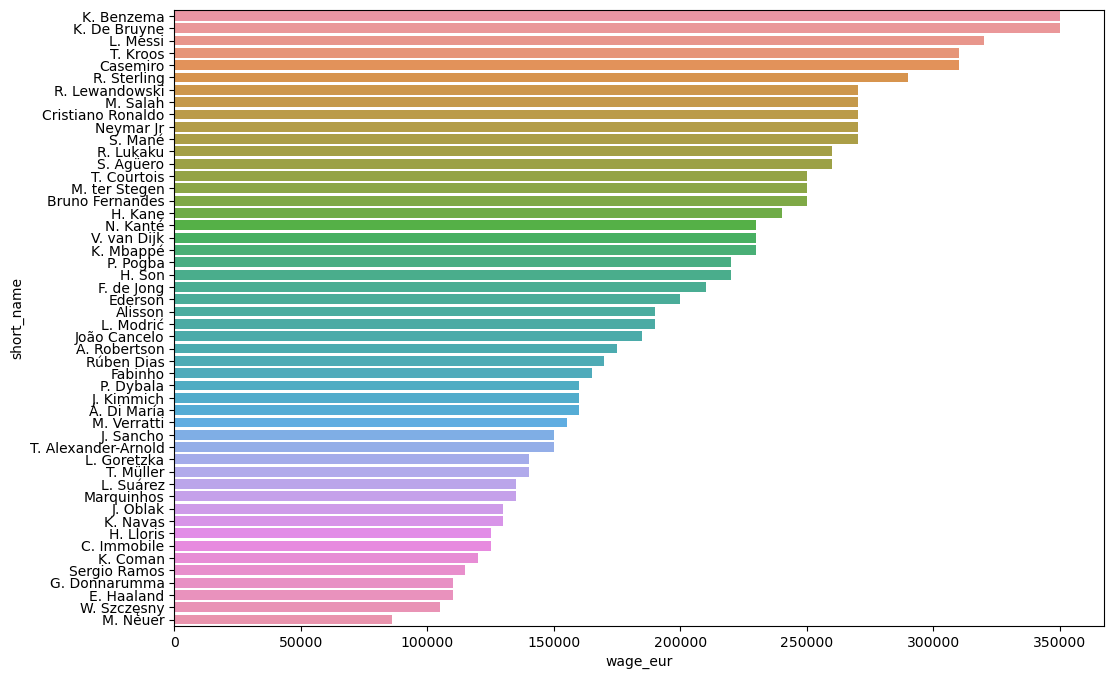

In [26]:
# plotting the top 50 players with their wage
# sort the players with their wage 
top50_wage = top50.sort_values(by='wage_eur', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x= top50_wage['wage_eur'] , y= top50_wage['short_name'])
plt.show()

## Data preprocessing and cleaning

In [27]:
len(correlated_columns)

20

In [28]:
# adding categorical columns to the correlated columns
correlated_columns += ['club_name', 'league_name',
       'league_level', 'club_position',  'nationality_name', 'preferred_foot', 
       'body_type', 'release_clause_eur']
len(correlated_columns)

28

In [29]:
# getting data with the correlated columns and categorical columns
df_new = df[correlated_columns]
df_new.head()


,wage_eur,value_eur,release_clause_eur,international_reputation,overall,movement_reactions,potential,passing,mentality_composure,dribbling,...,skill_moves,attacking_volleys,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,body_type,release_clause_eur
0,320000.0,78000000.0,144300000.0,5,93,94,93,91.0,96,95.0,...,4,88,Paris Saint-Germain,French Ligue 1,1.0,RW,Argentina,Left,Unique,144300000.0
1,270000.0,119500000.0,197200000.0,5,92,93,92,79.0,88,86.0,...,4,89,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,Right,Unique,197200000.0
2,270000.0,45000000.0,83300000.0,5,91,94,91,80.0,95,88.0,...,5,86,Manchester United,English Premier League,1.0,ST,Portugal,Right,Unique,83300000.0
3,270000.0,129000000.0,238700000.0,5,91,89,91,86.0,93,94.0,...,5,86,Paris Saint-Germain,French Ligue 1,1.0,LW,Brazil,Right,Unique,238700000.0
4,350000.0,125500000.0,232200000.0,4,91,91,91,93.0,89,88.0,...,4,82,Manchester City,English Premier League,1.0,RCM,Belgium,Right,Unique,232200000.0


In [30]:
# drop the null value eur
df_new = df_new[df_new['value_eur'].notna()]
# drop the null wage eur
df_new = df_new[df_new['wage_eur'].notna()]


df_new.isna().sum()

wage_eur                        0
value_eur                       0
release_clause_eur           1102
international_reputation        0
overall                         0
movement_reactions              0
potential                       0
passing                      2124
mentality_composure             0
dribbling                    2124
mentality_vision                0
power_shot_power                0
attacking_short_passing         0
shooting                     2124
skill_long_passing              0
skill_ball_control              0
skill_curve                     0
goalkeeping_speed           17041
skill_moves                     0
attacking_volleys               0
club_name                       0
league_name                     0
league_level                    0
club_position                   0
nationality_name                0
preferred_foot                  0
body_type                       0
release_clause_eur           1102
dtype: int64

In [31]:
# drop the null columns in the categorical columns
# getting null columns
null_columns = df_new.columns[df_new.isna().any()].tolist()

# drop the null columns
df_new = df_new.drop(null_columns, axis=1)

In [32]:
df_new.head()

,wage_eur,value_eur,international_reputation,overall,movement_reactions,potential,mentality_composure,mentality_vision,power_shot_power,attacking_short_passing,...,skill_curve,skill_moves,attacking_volleys,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,body_type
0,320000.0,78000000.0,5,93,94,93,96,95,86,91,...,93,4,88,Paris Saint-Germain,French Ligue 1,1.0,RW,Argentina,Left,Unique
1,270000.0,119500000.0,5,92,93,92,88,81,90,85,...,79,4,89,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,Right,Unique
2,270000.0,45000000.0,5,91,94,91,95,76,94,80,...,81,5,86,Manchester United,English Premier League,1.0,ST,Portugal,Right,Unique
3,270000.0,129000000.0,5,91,89,91,93,90,80,86,...,88,5,86,Paris Saint-Germain,French Ligue 1,1.0,LW,Brazil,Right,Unique
4,350000.0,125500000.0,4,91,91,91,89,94,91,94,...,85,4,82,Manchester City,English Premier League,1.0,RCM,Belgium,Right,Unique


In [33]:
df_new['body_type'].value_counts()

Normal (170-185)    6664
Normal (185+)       4211
Lean (170-185)      4071
Lean (185+)         1929
Normal (170-)        668
Stocky (170-185)     559
Lean (170-)          477
Stocky (185+)        353
Unique               136
Stocky (170-)         97
Name: body_type, dtype: int64

In [34]:
df_new['body_type'] = df_new['body_type'].str.split('(').str[0]
df_new['body_type'].value_counts()

Normal     11543
Lean        6477
Stocky      1009
Unique       136
Name: body_type, dtype: int64

In [35]:
# getting the categorical columns
categorical_columns = df_new.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_columns

['club_name',
 'league_name',
 'club_position',
 'nationality_name',
 'preferred_foot',
 'body_type']

In [36]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wage_eur                  19165 non-null  float64
 1   value_eur                 19165 non-null  float64
 2   international_reputation  19165 non-null  int64  
 3   overall                   19165 non-null  int64  
 4   movement_reactions        19165 non-null  int64  
 5   potential                 19165 non-null  int64  
 6   mentality_composure       19165 non-null  int64  
 7   mentality_vision          19165 non-null  int64  
 8   power_shot_power          19165 non-null  int64  
 9   attacking_short_passing   19165 non-null  int64  
 10  skill_long_passing        19165 non-null  int64  
 11  skill_ball_control        19165 non-null  int64  
 12  skill_curve               19165 non-null  int64  
 13  skill_moves               19165 non-null  int64  
 14  attack

In [37]:
df_new['club_name'].value_counts()

Paris Saint-Germain          33
RC Celta de Vigo             33
Norwich City                 33
Real Betis Balompié          33
Burnley                      33
                             ..
Club Athletico Paranaense    20
América de Cali              20
Harrogate Town               19
Wellington Phoenix           19
12 de Octubre FC             19
Name: club_name, Length: 701, dtype: int64

In [38]:
df_new[categorical_columns] = df_new[categorical_columns].astype(str)
df_new.head()

,wage_eur,value_eur,international_reputation,overall,movement_reactions,potential,mentality_composure,mentality_vision,power_shot_power,attacking_short_passing,...,skill_curve,skill_moves,attacking_volleys,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,body_type
0,320000.0,78000000.0,5,93,94,93,96,95,86,91,...,93,4,88,Paris Saint-Germain,French Ligue 1,1.0,RW,Argentina,Left,Unique
1,270000.0,119500000.0,5,92,93,92,88,81,90,85,...,79,4,89,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,Right,Unique
2,270000.0,45000000.0,5,91,94,91,95,76,94,80,...,81,5,86,Manchester United,English Premier League,1.0,ST,Portugal,Right,Unique
3,270000.0,129000000.0,5,91,89,91,93,90,80,86,...,88,5,86,Paris Saint-Germain,French Ligue 1,1.0,LW,Brazil,Right,Unique
4,350000.0,125500000.0,4,91,91,91,89,94,91,94,...,85,4,82,Manchester City,English Premier League,1.0,RCM,Belgium,Right,Unique


In [39]:
df_new['nationality_name'].value_counts() 

England             1717
Germany             1214
Spain               1085
France               980
Argentina            956
                    ... 
Ethiopia               1
Papua New Guinea       1
Kyrgyzstan             1
Guam                   1
Indonesia              1
Name: nationality_name, Length: 163, dtype: int64

In [40]:
# transfroing the categorical columns to numerical columns
# using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new[categorical_columns] = df_new[categorical_columns].apply(lambda col: le.fit_transform(col))
df_new.head()


,wage_eur,value_eur,international_reputation,overall,movement_reactions,potential,mentality_composure,mentality_vision,power_shot_power,attacking_short_passing,...,skill_curve,skill_moves,attacking_volleys,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,body_type
0,320000.0,78000000.0,5,93,94,93,96,95,86,91,...,93,4,88,470,19,1.0,25,6,0,3
1,270000.0,119500000.0,5,92,93,92,88,81,90,85,...,79,4,89,241,21,1.0,27,123,1,3
2,270000.0,45000000.0,5,91,94,91,95,76,94,80,...,81,5,86,412,17,1.0,27,124,1,3
3,270000.0,129000000.0,5,91,89,91,93,90,80,86,...,88,5,86,470,19,1.0,14,20,1,3
4,350000.0,125500000.0,4,91,91,91,89,94,91,94,...,85,4,82,411,17,1.0,19,13,1,3


In [41]:
# Save the new df to csv file
df_new.to_csv('players_22_new.csv', index=False)